# Esercitazione 8
L'esercitazione 8 richiede di implementare metodi Monte Carlo variazionali per valutare l'energia di ground state per una particella soggetta ad un potenziale unidimensionale $V(x)=x^4-\cfrac{5}{2}x^2$; in particolare, si richiede di calcolare i parametri $\mu$ e $\sigma$ della funzione d'onda della particella nel ground state attraverso un algoritmo di _Simulated Annealing_. 

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
color_palette = sns.color_palette("bright")

def Vpot(x):
    return (x**2 - 2.5)*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])

Ground state energy:  -0.46046587969271563


## Esercizio 8.2

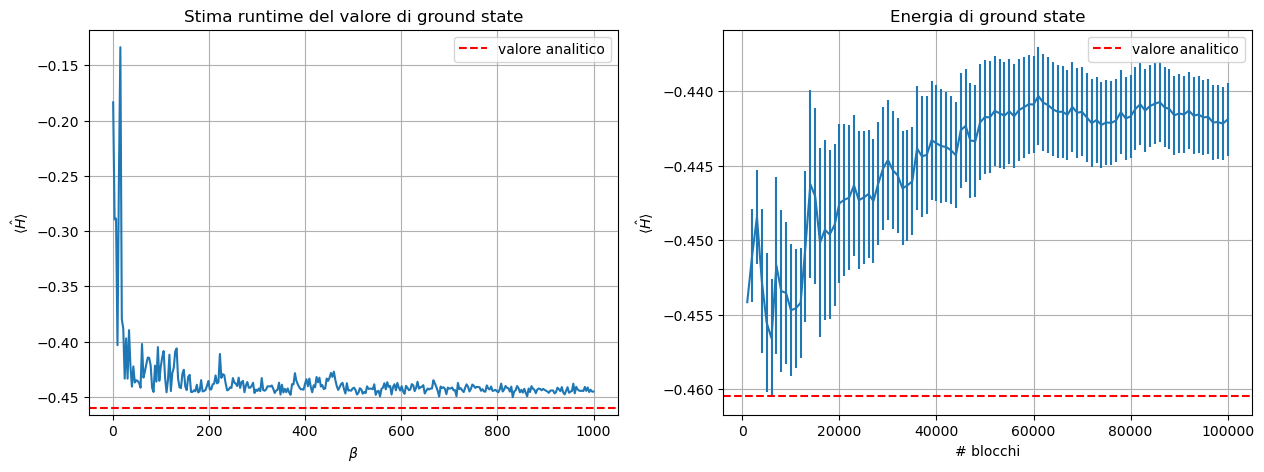

In [6]:
beta, ene = np.loadtxt("risultati/Beta.dat",usecols=(0,1), delimiter=',', unpack='true') 
x, sum, error = np.loadtxt("risultati/Energy.dat", usecols=(0,1,2), delimiter=',', unpack='true')


fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))

ax0.plot(beta, ene)
ax0.axhline(y=E[0], color='r', ls='--', label='valore analitico')
ax0.set_title('Stima runtime del valore di ground state')
ax0.set_ylabel(r'$\langle \hat{H} \rangle$')
ax0.set_xlabel(r'$\beta$')
ax0.grid(True)
ax0.legend()

ax1.set_title('Energia di ground state')
ax1.errorbar(x,sum,yerr=error)
ax1.axhline(y=E[0], color='r', ls='--', label='valore analitico')
ax1.set_ylabel(r'$\langle \hat{H} \rangle$')
ax1.set_xlabel('# blocchi')
ax1.grid(True)
ax1.legend()

plt.show()

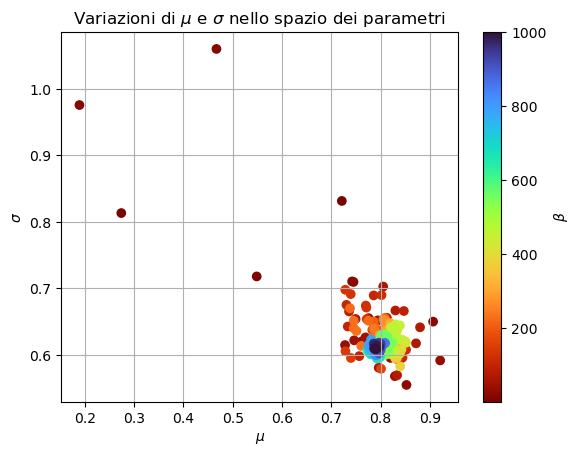

In [2]:
beta, mu, sigma= np.loadtxt("risultati/Parameters.dat", usecols=(0, 1, 2), unpack='true', delimiter=",")
plt.scatter(mu, sigma, c=beta, cmap='turbo_r')
plt.colorbar(label=r"$\beta$", orientation="vertical")
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')
plt.grid()
plt.title(r"Variazioni di $\mu$ e $\sigma$ nello spazio dei parametri")
plt.show()